# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [ ]:
import pandas as pd

In [ ]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Follow along with the live coding activity to see how this works.

In [ ]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0

Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [4]:
# You will need to import numpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpl

In [5]:
# You can use this function in your code to find the log of distance:

# np.log10()

### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

In [6]:
oh = pd.read_csv("oh_table.csv")
oh.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


In [7]:
distance = oh["distance"].loc[oh["group_id"] == 0]
G = oh["G"].loc[oh["group_id"] == 0]
J = oh["J"].loc[oh["group_id"] == 0]

In [8]:
mag = G - 5 * np.log10(distance) + 5
max(mag)
min(mag)

0.2037731174058086

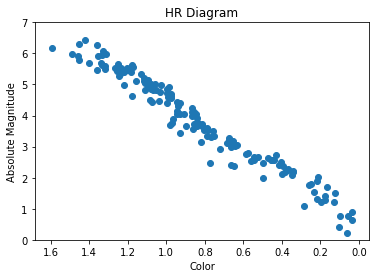

In [33]:
plt.scatter(G-J, mag)
plt.ylim([0, 7])
plt.xlabel('Color')
plt.ylabel('Absolute Magnitude')
plt.title('HR Diagram')
plt.gca().invert_xaxis() 
plt.show()

### Coding Challenge 1: Add the sun to your color magnitude diagram

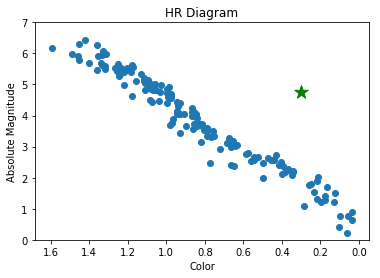

In [38]:
plt.scatter(G-J, mag)
plt.scatter(0.3, 4.77, c='green', s=200, marker='*')
plt.ylim([0, 7])
plt.xlabel('Color')
plt.ylabel('Absolute Magnitude')
plt.title('HR Diagram')
plt.gca().invert_xaxis() 
plt.show()

### Coding Challenge 2: Add a colormap to your diagram

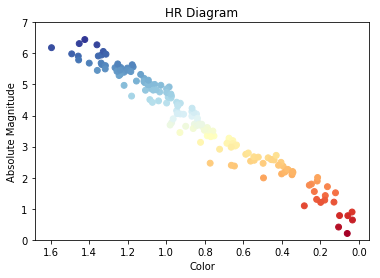

In [22]:
cm = plt.cm.get_cmap("RdYlBu")# This is the colormap we'll use for our data points. Note: _r reverses the colormap
plt.scatter(G-J, mag, c=mag, s=35, cmap=cm) # This plots all our points as a scatterplot
plt.ylim([0, 7])
plt.xlabel('Color')
plt.ylabel('Absolute Magnitude')
plt.title('HR Diagram')
plt.gca().invert_xaxis() 
plt.show()

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

(array([ 6.,  5.,  7.,  3.,  8.,  7.,  5.,  6.,  6., 11., 13., 11., 14.,
        13.,  9., 10., 10.,  2.,  4.,  1.]),
 array([0.033  , 0.11115, 0.1893 , 0.26745, 0.3456 , 0.42375, 0.5019 ,
        0.58005, 0.6582 , 0.73635, 0.8145 , 0.89265, 0.9708 , 1.04895,
        1.1271 , 1.20525, 1.2834 , 1.36155, 1.4397 , 1.51785, 1.596  ]),
 <a list of 20 Patch objects>)

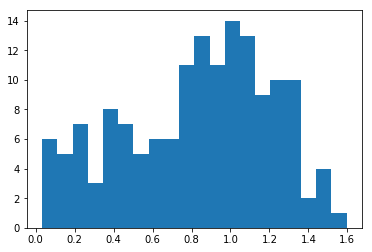

In [30]:
plt.hist(G-J, 20)